# Blanqueado de datos

El blanqueado de una matriz de datos, $\mathbf{X}\in\mathbb{R}^{N\times D}$, consiste en aplicar una afinidad tal que los datos blanqueados exhiban media nula y matriz de covarianzas identidad. La matriz blanqueante puede hallarse mediante **principal component analysis (PCA)**, a partir de la descomposición propia de la matriz de covarianzas empírica, $\mathbf{\Sigma}=\mathbf{U}\boldsymbol{\Lambda}\mathbf{U}^t$:
$$\mathbf{W}_{\text{pca}}=\boldsymbol{\Lambda}^{-1/2}\mathbf{U}^t$$
Nótese que $\mathbf{W}_{\text{pca}}$ es la misma transformación lineal que reduce la distancia de Mahalanobis (al cuadrado) a distancia Euclídea (al cuadrado):
$$\Delta^2(\boldsymbol{y},\boldsymbol{\mu};\mathbf{\Sigma}^{-1})%
=\lVert\boldsymbol{z}\rVert_2^2%
\quad\text{con}\quad%
\boldsymbol{z}=\mathbf{W}_{\text{pca}}(\boldsymbol{y}-\boldsymbol{\mu})$$
Así, el blanqueado PCA de $\mathbf{X}$ es:
$$\operatorname{whitening}(\mathbf{X})%
=(\mathbf{X}-\mathbf{1}_N\boldsymbol{\mu}^t)\mathbf{W}_{\text{pca}}^t%
=(\mathbf{X}-\mathbf{1}_N\boldsymbol{\mu}^t)\mathbf{U}\boldsymbol{\Lambda}^{-1/2}$$

**Ejemplo:** $\mathbf{X}^t=\begin{bmatrix}-1&0&2&3\\-1&2&0&3\end{bmatrix}$

In [6]:
import numpy as np

X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ])
m = np.mean(X, axis=0)
S = np.cov(X.T, bias=True)
La, U = np.linalg.eigh(S)
i = La.argsort()[::-1]; La = La[i]; U = U[:,i]
W = np.sqrt(np.linalg.inv(np.diag(La))) @ U.T
Xw = (X - m) @ W.T
A = U @ np.diag(np.sqrt(La))
print("Matriz blanqueante PCA:\n", W, "\nDatos blanqueados:\n", Xw)

Matriz blanqueante PCA:
 [[ 0.35355339  0.35355339]
 [-0.70710678  0.70710678]] 
Datos blanqueados:
 [[-1.41421356  0.        ]
 [ 0.          1.41421356]
 [ 0.         -1.41421356]
 [ 1.41421356  0.        ]]


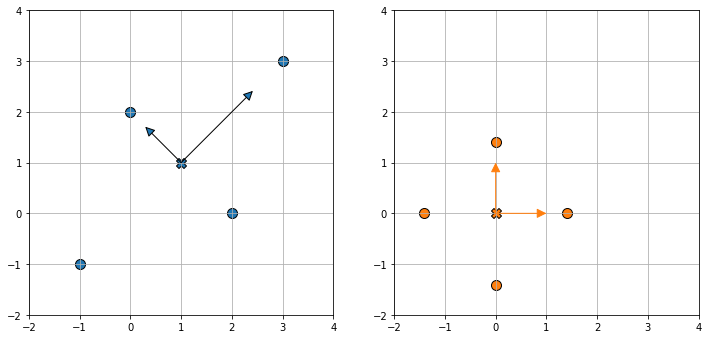

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# datos originales
axes[0].set(aspect='equal', xlim=(-2, 4), ylim=(-2, 4)); axes[0].grid()
axes[0].scatter(m[0], m[1], facecolor='C0', edgecolor='k', s=100, marker="X")
prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8", shrinkA=0, shrinkB=0)
axes[0].annotate("", xytext=(m[0], m[1]), xy=(m[0]+A[0,0], m[1]+A[1,0]), arrowprops=prop)
axes[0].annotate("", xytext=(m[0], m[1]), xy=(m[0]+A[0,1], m[1]+A[1,1]), arrowprops=prop)
axes[0].scatter(X[:,0], X[:,1], facecolor='C0', edgecolor='k', s=100)
# datos blanqueados
axes[1].set(aspect='equal', xlim=(-2, 4), ylim=(-2, 4)); axes[1].grid()
axes[1].scatter(0, 0, facecolor='C1', edgecolor='k', s=100, marker="X")
prop.update(color='C1')
axes[1].annotate("", xytext=(0, 0), xy=(1, 0), arrowprops=prop)
axes[1].annotate("", xytext=(0, 0), xy=(0, 1), arrowprops=prop)
axes[1].scatter(Xw[:,0], Xw[:,1], facecolor='C1', edgecolor='k', s=100);